# BANXICO

In [4]:
import requests
import pandas as pd
import numpy as np

In [5]:
token = 'd3101e248affe7e559ffc5c862f2027fa7ab6b6ef3213f1a9d99b5fff68d5edb'

def descarga_bmx_serie(serie, fechainicio, fechafin, token):
    url = f'https://www.banxico.org.mx/SieAPIRest/service/v1/series/{serie}/datos/{fechainicio}/{fechafin}'
    headers = {'Bmx-Token': token}
    response = requests.get(url, headers=headers)
    status = response.status_code

    if status != 200:
        print(f'Error en la consulta, codigo {status}')
        return None

    raw_data = response.json()
    data = raw_data['bmx']['series'][0]['datos']
    df = pd.DataFrame(data)
    df['dato'] = df['dato'].apply(lambda x: float(x))
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
    df.set_index('fecha', inplace=True)
    return df

# Ejemplos de uso:
dolares_bmx = descarga_bmx_serie('SF63528', '2016-01-01', '2019-10-01', token)
# tiie28_bmx = descarga_bmx_serie('SF43783', '2016-01-01', '2019-10-01', token)
# udis_bmx = descarga_bmx_serie('SP68257', '2016-01-01', '2019-10-01', token)
# cetes_bmx = descarga_bmx_serie('SF282', '2016-01-01', '2019-10-01', token)



In [6]:
dolares_bmx

,dato
fecha,
2016-01-04,17.3529
2016-01-05,17.3456
2016-01-06,17.4411
2016-01-07,17.6568
2016-01-08,17.9283
...,...
2019-09-25,19.5775
2019-09-26,19.6363
2019-09-27,19.6808


In [22]:
import requests
import pandas as pd
import numpy as np

token = 'd2db5f6dec888980d6d3b99a0284b5305cf55d17b95e669796f17bd7bc3e9d82'

def descarga_bmx_serie(serie, fechainicio, fechafin, token):
    url = f'https://www.banxico.org.mx/SieAPIRest/service/v1/series/{serie}/datos/{fechainicio}/{fechafin}'
    print(f'URL generada: {url}')  # un print para verificar la URL generada
    headers = {'Bmx-Token': token}
    response = requests.get(url, headers=headers)
    status = response.status_code

    if status != 200:
        print(f'Error en la consulta, codigo {status}: {response.text}')  # Añadir respuesta detallada
        return None

    raw_data = response.json()
    data = raw_data['bmx']['series'][0]['datos']
    df = pd.DataFrame(data)
    df['dato'] = df['dato'].apply(lambda x: float(x))
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
    df.set_index('fecha', inplace=True)

    # Añadir columna de variación porcentual diaria
    df['variacion_diaria'] = df['dato'].pct_change() * 100

    return df

In [23]:
# Ejemplos de uso:
dolares_bmx = descarga_bmx_serie('SF63528', '2016-01-01', '2019-10-01', token)
if dolares_bmx is not None:
    print(dolares_bmx.head())

URL generada: https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF63528/datos/2016-01-01/2019-10-01
               dato  variacion_diaria
fecha                                
2016-01-04  17.3529               NaN
2016-01-05  17.3456         -0.042068
2016-01-06  17.4411          0.550572
2016-01-07  17.6568          1.236734
2016-01-08  17.9283          1.537651


In [24]:
dolares_bmx

,dato,variacion_diaria
fecha,,
2016-01-04,17.3529,NaN
2016-01-05,17.3456,-0.042068
2016-01-06,17.4411,0.550572
2016-01-07,17.6568,1.236734
2016-01-08,17.9283,1.537651
...,...,...
2019-09-25,19.5775,0.610524
2019-09-26,19.6363,0.300345
2019-09-27,19.6808,0.226621


             dato  variacion_diaria
count  943.000000        942.000000
mean    19.007186          0.016876
std      0.855949          0.774964
min     17.176700         -2.941308
25%     18.505650         -0.444729
50%     18.970100         -0.023440
75%     19.426350          0.393191
max     21.907600          7.650914


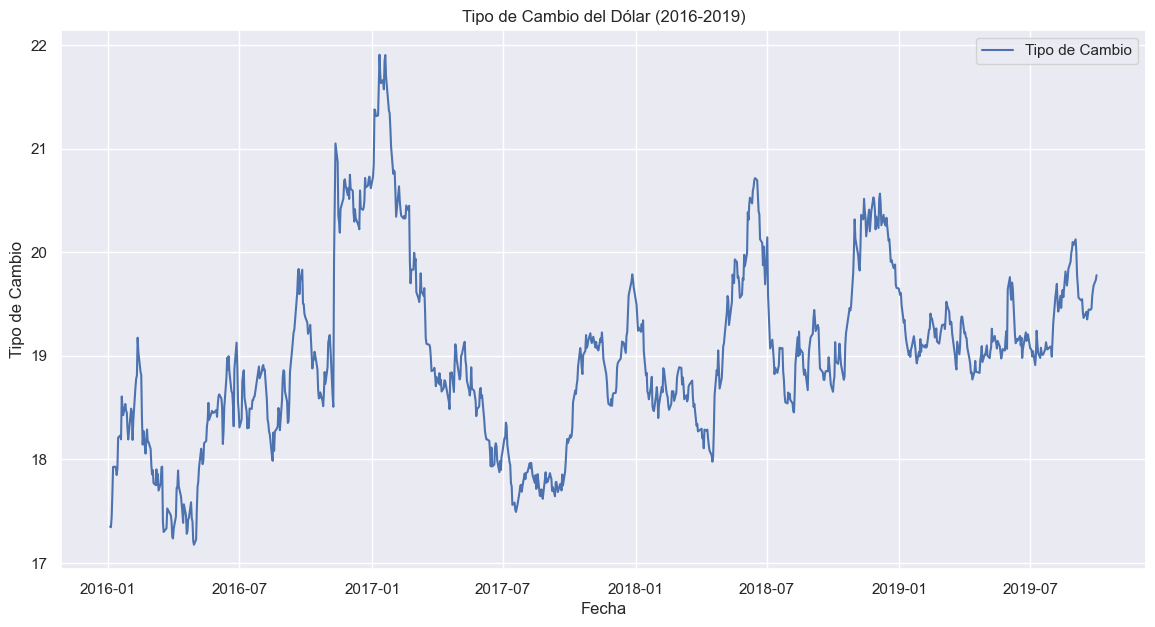

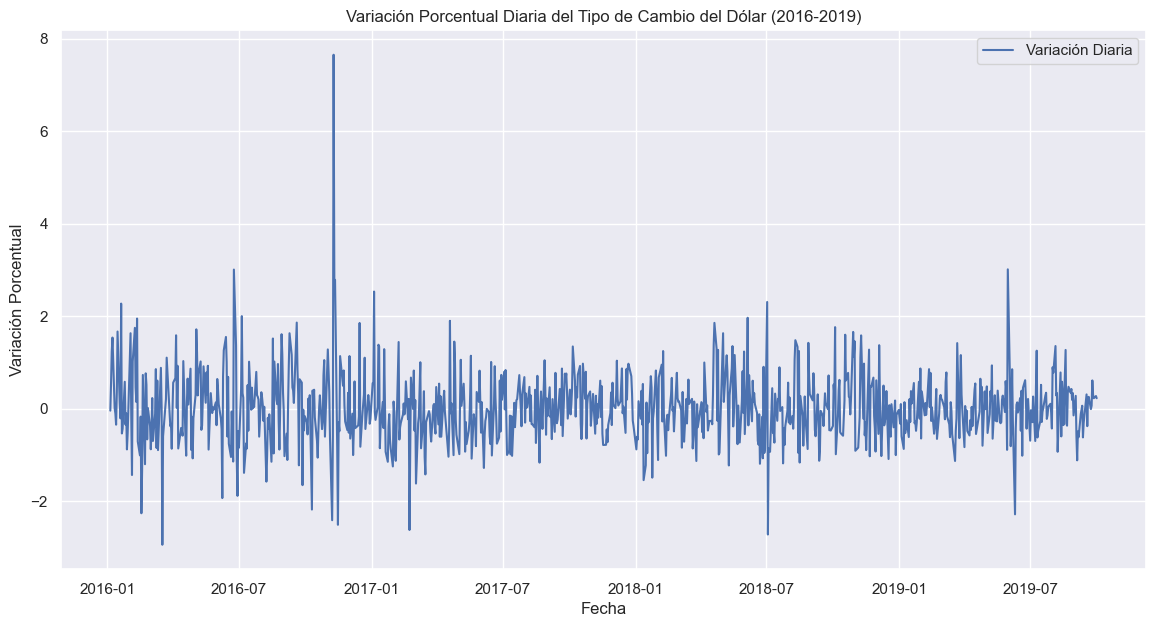

In [16]:
import matplotlib.pyplot as plt

# Resumen estadístico de los datos
print(dolares_bmx.describe())

# Visualización de la serie temporal
plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['dato'], label='Tipo de Cambio')
plt.title('Tipo de Cambio del Dólar (2016-2019)')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()

# Visualización de la variación porcentual diaria
plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['variacion_diaria'], label='Variación Diaria')
plt.title('Variación Porcentual Diaria del Tipo de Cambio del Dólar (2016-2019)')
plt.xlabel('Fecha')
plt.ylabel('Variación Porcentual')
plt.legend()
plt.show()


In [26]:
# Crear características y etiquetas
dolares_bmx['dato_shift'] = dolares_bmx['dato'].shift(-1)
dolares_bmx = dolares_bmx.dropna()

# Dividir en características (X) y etiquetas (y)
X = dolares_bmx[['dato']]
y = dolares_bmx['dato_shift']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [31]:
dolares_bmx

,dato,variacion_diaria,dato_shift
fecha,,,
2016-01-05,17.3456,-0.042068,17.4411
2016-01-06,17.4411,0.550572,17.6568
2016-01-07,17.6568,1.236734,17.9283
2016-01-08,17.9283,1.537651,17.9304
2016-01-11,17.9304,0.011713,17.9119
...,...,...,...
2019-09-24,19.4587,0.065824,19.5775
2019-09-25,19.5775,0.610524,19.6363
2019-09-26,19.6363,0.300345,19.6808


Mean Squared Error: 0.011421067658931541
R^2 Score: 0.8572797665894354


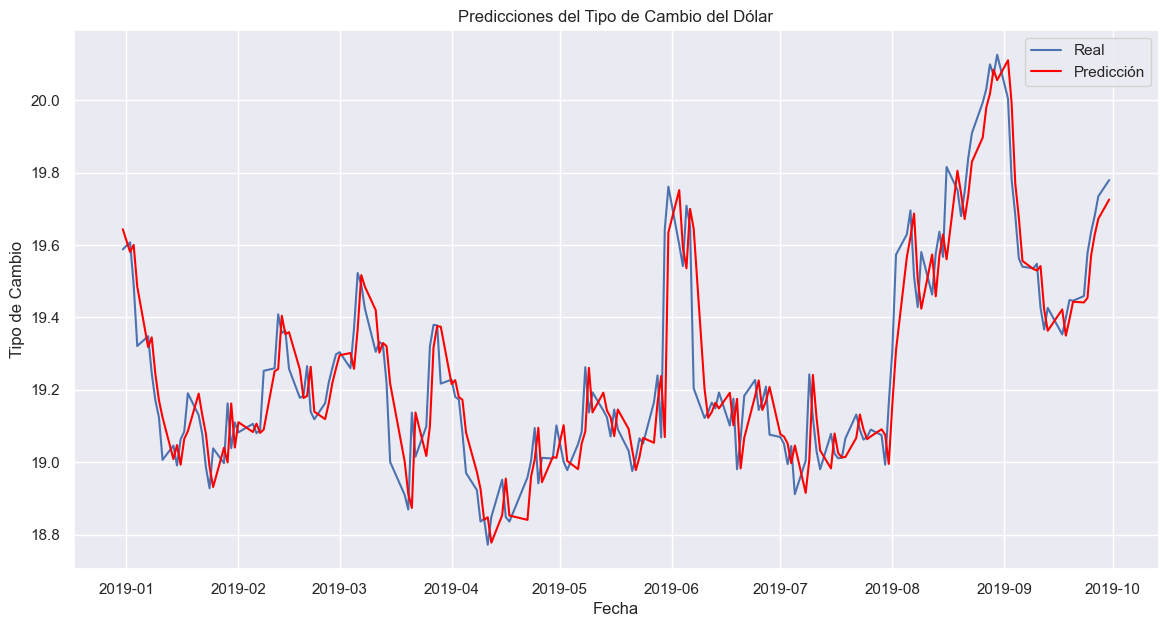

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualización de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, y_pred, color='red', label='Predicción')
plt.title('Predicciones del Tipo de Cambio del Dólar')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()


In [34]:
# Predicciones futuras
ultimo_valor = dolares_bmx['dato'].iloc[-1]
predicciones_futuras = []

# Hacer predicciones para los próximos 30 días
for i in range(30):
    prediccion = model.predict([[ultimo_valor]])[0]
    predicciones_futuras.append(prediccion)
    ultimo_valor = prediccion

# Crear un índice de fechas para las predicciones futuras
forecast_index = pd.date_range(start=dolares_bmx.index[-1], periods=30 + 1, closed='right')[1:]

# Crear un DataFrame para visualizar las predicciones futuras
forecast_df = pd.DataFrame(data=predicciones_futuras, index=forecast_index, columns=['Predicción'])

# Visualización de las predicciones futuras
plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['dato'], label='Datos Históricos')
plt.plot(forecast_df, color='red', label='Predicción Futura')
plt.title('Predicción Futura del Tipo de Cambio del Dólar')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWa

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

In [35]:
dolares_bmx

,dato,variacion_diaria,dato_shift
fecha,,,
2016-01-05,17.3456,-0.042068,17.4411
2016-01-06,17.4411,0.550572,17.6568
2016-01-07,17.6568,1.236734,17.9283
2016-01-08,17.9283,1.537651,17.9304
2016-01-11,17.9304,0.011713,17.9119
...,...,...,...
2019-09-24,19.4587,0.065824,19.5775
2019-09-25,19.5775,0.610524,19.6363
2019-09-26,19.6363,0.300345,19.6808


In [37]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Token de Banxico
token = 'd2db5f6dec888980d6d3b99a0284b5305cf55d17b95e669796f17bd7bc3e9d82'

def descarga_bmx_serie(serie, fechainicio, fechafin, token):
    url = f'https://www.banxico.org.mx/SieAPIRest/service/v1/series/{serie}/datos/{fechainicio}/{fechafin}'
    headers = {'Bmx-Token': token}
    response = requests.get(url, headers=headers)
    status = response.status_code

    if status != 200:
        print(f'Error en la consulta, codigo {status}: {response.text}')
        return None

    raw_data = response.json()
    data = raw_data['bmx']['series'][0]['datos']
    df = pd.DataFrame(data)
    df['dato'] = df['dato'].apply(lambda x: float(x))
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
    df.set_index('fecha', inplace=True)

    # Añadir columna de variación porcentual diaria
    df['variacion_diaria'] = df['dato'].pct_change() * 100

    return df

# Descargar datos
dolares_bmx = descarga_bmx_serie('SF63528', '2016-01-01', '2019-10-01', token)



In [38]:
dolares_bmx.describe()

,dato,variacion_diaria
count,943.000000,942.000000
mean,19.007186,0.016876
std,0.855949,0.774964
min,17.176700,-2.941308
25%,18.505650,-0.444729
50%,18.970100,-0.023440
75%,19.426350,0.393191
max,21.907600,7.650914


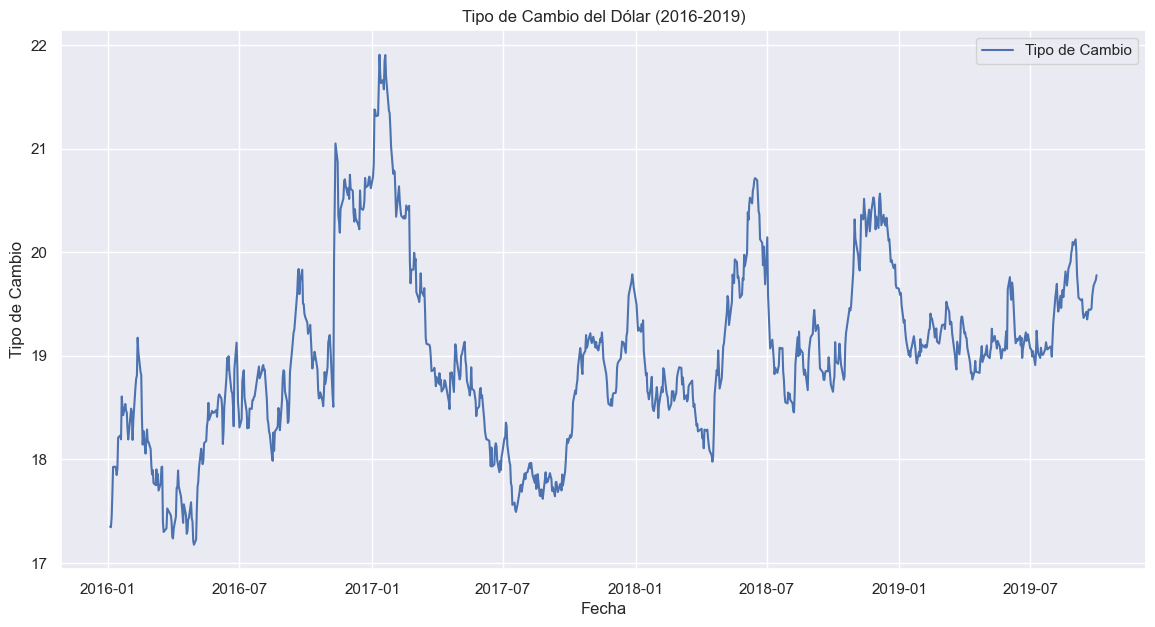

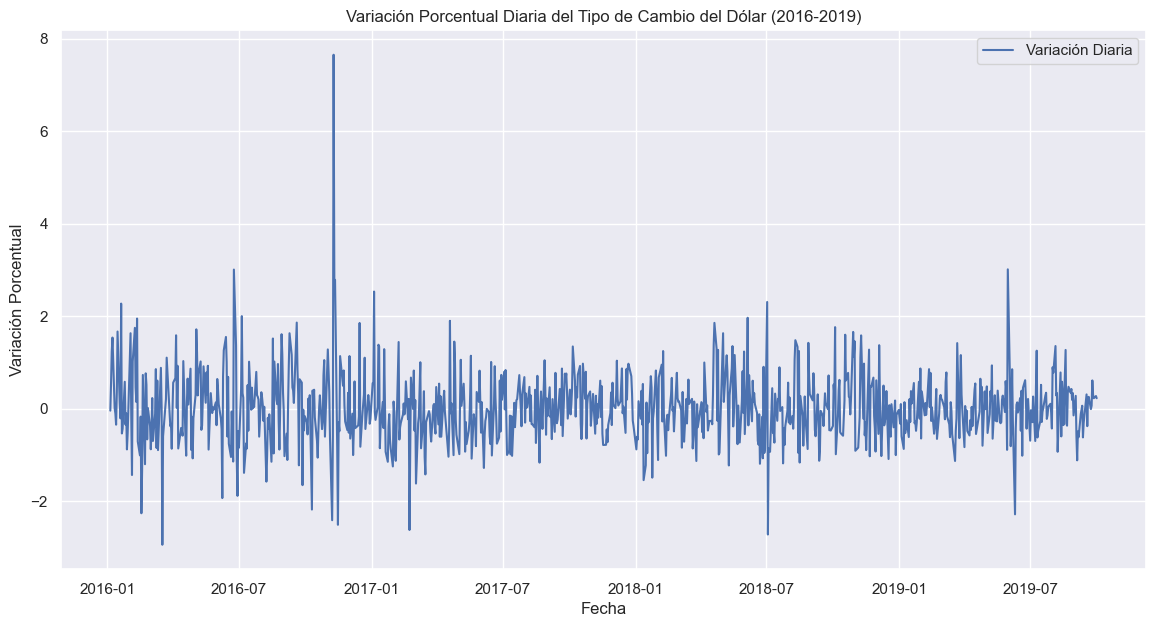

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['dato'], label='Tipo de Cambio')
plt.title('Tipo de Cambio del Dólar (2016-2019)')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['variacion_diaria'], label='Variación Diaria')
plt.title('Variación Porcentual Diaria del Tipo de Cambio del Dólar (2016-2019)')
plt.xlabel('Fecha')
plt.ylabel('Variación Porcentual')
plt.legend()
plt.show()



In [40]:
# Preparación de datos
dolares_bmx['dato_shift'] = dolares_bmx['dato'].shift(-1)
dolares_bmx = dolares_bmx.dropna()

# Dividir en características (X) y etiquetas (y)
X = dolares_bmx[['dato']]
y = dolares_bmx['dato_shift']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [41]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')



Mean Squared Error: 0.011421067658931541
R^2 Score: 0.8572797665894354


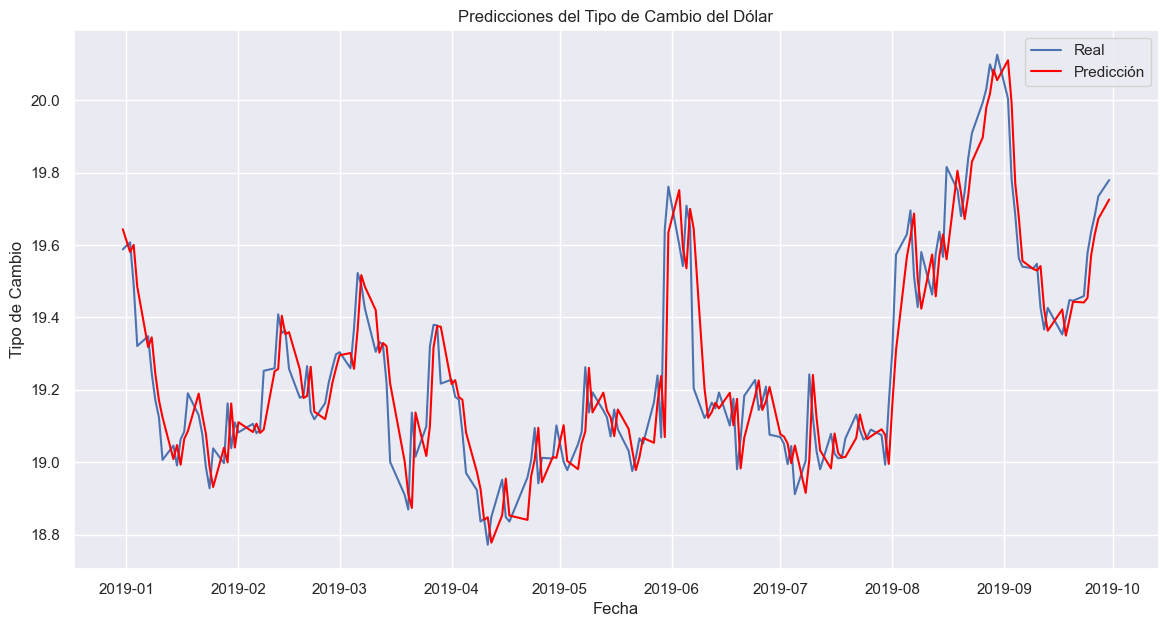

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, y_pred, color='red', label='Predicción')
plt.title('Predicciones del Tipo de Cambio del Dólar')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()



In [45]:
predicciones_futuras

[19.725304187693258,
 19.71625119504015,
 19.70733880391652,
 19.69856483064777,
 19.689927125473826,
 19.68142357202243,
 19.673052086790584,
 19.664810618634046,
 19.656697148264797,
 19.648709687756266,
 19.640846280056255,
 19.633104998507438,
 19.625483946375297,
 19.6179812563834,
 19.610595090255867,
 19.603323638266996,
 19.596165118797828,
 19.589117777899624,
 19.582179888864136,
 19.575349751800523,
 19.568625693218852,
 19.56200606562007,
 19.555489247092346,
 19.54907364091367,
 19.542757675160626,
 19.53653980232327,
 19.53041849892593,
 19.524392265153967,
 19.518459624486272,
 19.512619123333504]

In [46]:
dolares_bmx

,dato,variacion_diaria,dato_shift
fecha,,,
2016-01-05,17.3456,-0.042068,17.4411
2016-01-06,17.4411,0.550572,17.6568
2016-01-07,17.6568,1.236734,17.9283
2016-01-08,17.9283,1.537651,17.9304
2016-01-11,17.9304,0.011713,17.9119
...,...,...,...
2019-09-24,19.4587,0.065824,19.5775
2019-09-25,19.5775,0.610524,19.6363
2019-09-26,19.6363,0.300345,19.6808


In [44]:
# Predicciones futuras
ultimo_valor = dolares_bmx['dato'].iloc[-1]
predicciones_futuras = []

# Hacer predicciones para los próximos 30 días
for i in range(30):
    prediccion = model.predict(np.array([[ultimo_valor]]))[0]
    predicciones_futuras.append(prediccion)
    ultimo_valor = prediccion

# Crear un índice de fechas para las predicciones futuras
forecast_index = pd.date_range(start=dolares_bmx.index[-1], periods=30 + 1, inclusive='right')[1:]

# Crear un DataFrame para visualizar las predicciones futuras
forecast_df = pd.DataFrame(data=predicciones_futuras, index=forecast_index, columns=['Predicción'])

# Visualización de las predicciones futuras
plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['dato'], label='Datos Históricos')
plt.plot(forecast_df, color='red', label='Predicción Futura')
plt.title('Predicción Futura del Tipo de Cambio del Dólar')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWa

ValueError: Shape of passed values is (30, 1), indices imply (29, 1)

In [67]:
# Token de Banxico
token = 'd2db5f6dec888980d6d3b99a0284b5305cf55d17b95e669796f17bd7bc3e9d82'

def descarga_bmx_serie(serie, fechainicio, fechafin, token):
    url = f'https://www.banxico.org.mx/SieAPIRest/service/v1/series/{serie}/datos/{fechainicio}/{fechafin}'
    headers = {'Bmx-Token': token}
    response = requests.get(url, headers=headers)
    status = response.status_code

    if status != 200:
        print(f'Error en la consulta, codigo {status}: {response.text}')
        return None

    raw_data = response.json()
    data = raw_data['bmx']['series'][0]['datos']
    df = pd.DataFrame(data)
    df['dato'] = df['dato'].apply(lambda x: float(x))
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
    df.set_index('fecha', inplace=True)

    # Añadir columna de variación porcentual diaria
    df['variacion_diaria'] = df['dato'].pct_change() * 100

    return df

# Descargar datos
dolares_bmx = descarga_bmx_serie('SF63528', '2016-01-01', '2019-10-01', token)


In [68]:

# Análisis exploratorio de datos
print(dolares_bmx.describe())

             dato  variacion_diaria
count  943.000000        942.000000
mean    19.007186          0.016876
std      0.855949          0.774964
min     17.176700         -2.941308
25%     18.505650         -0.444729
50%     18.970100         -0.023440
75%     19.426350          0.393191
max     21.907600          7.650914


In [56]:
# Preparación de datos
dolares_bmx['dato_shift'] = dolares_bmx['dato'].shift(-1)
dolares_bmx = dolares_bmx.dropna()

# Dividir en características (X) y etiquetas (y)
X = dolares_bmx[['dato']]
y = dolares_bmx['dato_shift']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [57]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.011421067658931541
R^2 Score: 0.8572797665894354


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWa

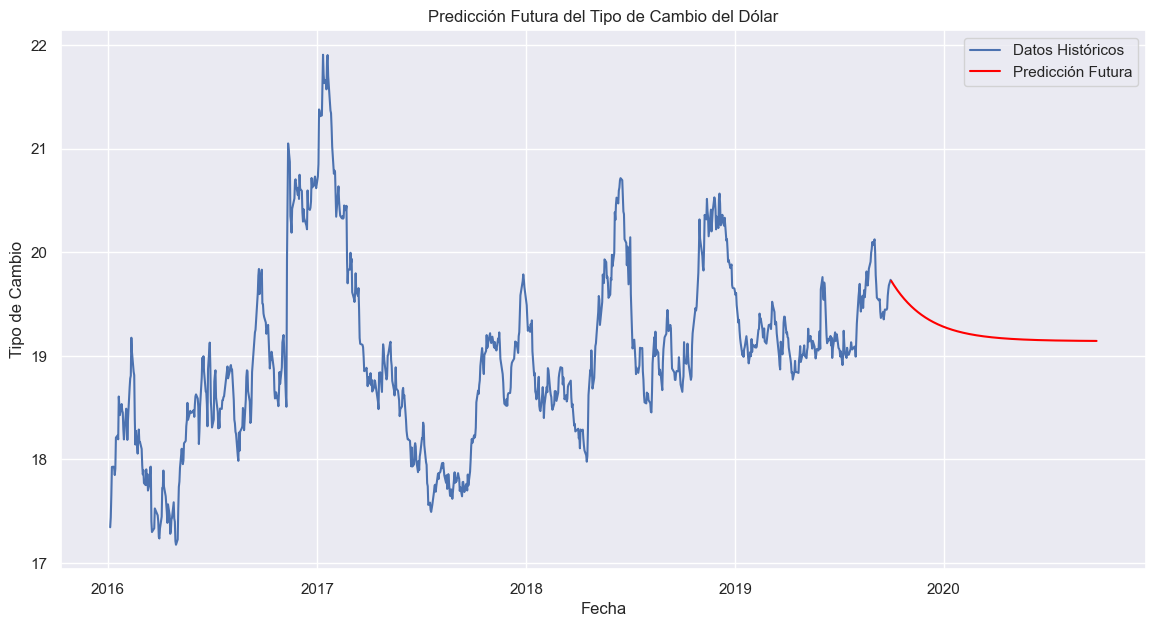

In [62]:
# Último valor conocido
ultimo_valor = dolares_bmx['dato'].iloc[-1]
predicciones_futuras = []

# Hacer predicciones para los próximos 30 días
for i in range(360):
    prediccion = model.predict(np.array([[ultimo_valor]]))[0]
    predicciones_futuras.append(prediccion)
    ultimo_valor = prediccion

# Crear un índice de fechas para las predicciones futuras
forecast_index = pd.date_range(start=dolares_bmx.index[-1] + pd.Timedelta(days=1), periods=360, freq='D')

# Crear un DataFrame para visualizar las predicciones futuras
forecast_df = pd.DataFrame(data=predicciones_futuras, index=forecast_index, columns=['Predicción'])

# Visualización de las predicciones futuras
plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['dato'], label='Datos Históricos')
plt.plot(forecast_df, color='red', label='Predicción Futura')
plt.title('Predicción Futura del Tipo de Cambio del Dólar')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()

In [61]:
30 * 8

240

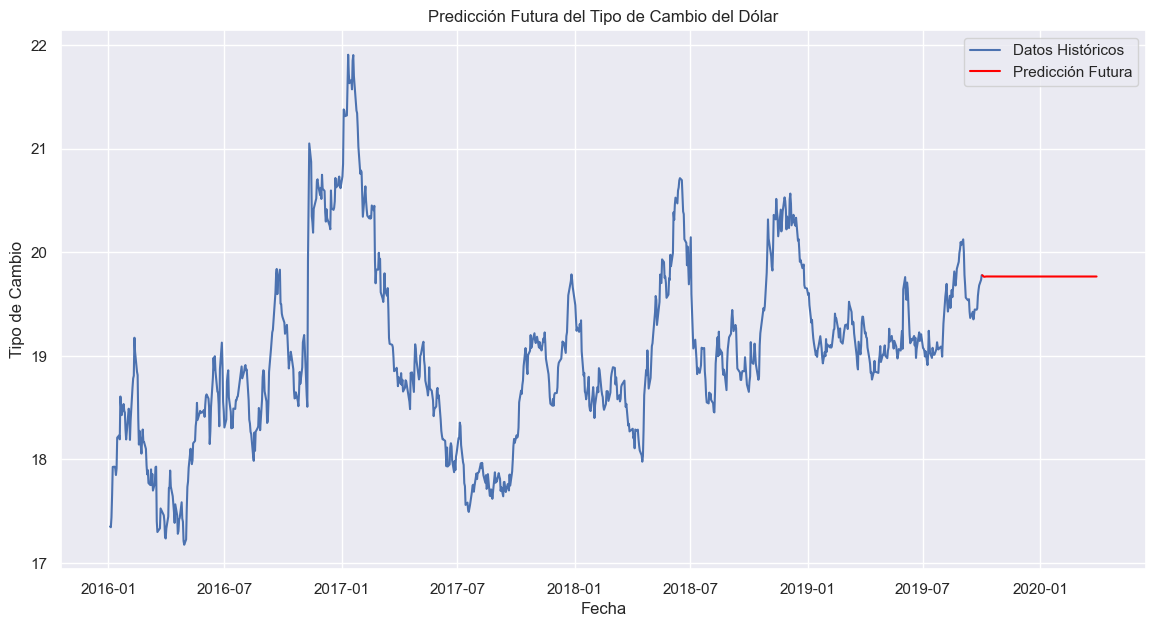

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Supongamos que ya tenemos los datos históricos
# dolares_bmx = ...

# Preparación de los datos para ARIMA
X = dolares_bmx['dato'].values

# Ajuste del modelo ARIMA
model = ARIMA(X, order=(5, 1, 0))  # (p, d, q) pueden ajustarse según sea necesario
model_fit = model.fit()

# Predicciones futuras para 180 días
forecast_steps = 180
forecast = model_fit.forecast(steps=forecast_steps)

# Crear un índice de fechas para las predicciones futuras
forecast_index = pd.date_range(start=dolares_bmx.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Crear un DataFrame para visualizar las predicciones futuras
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Predicción'])

# Visualización de las predicciones futuras
plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['dato'], label='Datos Históricos')
plt.plot(forecast_df, color='red', label='Predicción Futura')
plt.title('Predicción Futura del Tipo de Cambio del Dólar')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()



In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Función para determinar los parámetros p, d, q óptimos
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    aic = model_fit.aic
    return aic

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    aic = evaluate_arima_model(dataset, order)
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print(f'ARIMA{order} AIC={aic}')
                except:
                    continue
    print(f'Best ARIMA{best_cfg} AIC={best_score}')
    return best_cfg

# Determinación de los valores p, d, q
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = [0, 1, 2]
q_values = [0, 1, 2, 4, 6, 8, 10]

# Ajuste de parámetros
X = dolares_bmx['dato'].values
best_cfg = evaluate_models(X, p_values, d_values, q_values)

# Ajuste del modelo ARIMA con los mejores parámetros
model = ARIMA(X, order=best_cfg)
model_fit = model.fit()

# Predicciones futuras para 180 días
forecast_steps = 180
forecast = model_fit.forecast(steps=forecast_steps)

# Crear un índice de fechas para las predicciones futuras
forecast_index = pd.date_range(start=dolares_bmx.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Crear un DataFrame para visualizar las predicciones futuras
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Predicción'])

# Visualización de las predicciones futuras
plt.figure(figsize=(14, 7))
plt.plot(dolares_bmx['dato'], label='Datos Históricos')
plt.plot(forecast_df, color='red', label='Predicción Futura')
plt.title('Predicción Futura del Tipo de Cambio del Dólar')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.legend()
plt.show()


ARIMA(0, 0, 0) AIC=2043.2755052668072


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 1) AIC=1148.2511750890067
ARIMA(0, 0, 2) AIC=564.4038786530713
ARIMA(0, 0, 4) AIC=-34.109555285070854
ARIMA(0, 0, 6) AIC=-279.1727487321392
ARIMA(0, 0, 8) AIC=-370.8372350969201
ARIMA(0, 0, 10) AIC=-454.5316753872858
ARIMA(0, 1, 0) AIC=-658.2537991695604
ARIMA(0, 1, 1) AIC=-669.0325075726323
ARIMA(0, 1, 2) AIC=-667.0962971385152
ARIMA(0, 1, 4) AIC=-672.8851968429061
ARIMA(0, 1, 6) AIC=-672.1944691666812
ARIMA(0, 1, 8) AIC=-672.4856572563242
ARIMA(0, 1, 10) AIC=-676.2311086680775
ARIMA(0, 2, 0) AIC=-238.62297629750176
ARIMA(0, 2, 1) AIC=-648.0398659498705
ARIMA(0, 2, 2) AIC=-658.9879983778989
ARIMA(0, 2, 4) AIC=-658.5228555910821


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 6) AIC=-660.9274182224226


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 8) AIC=-662.0339135902691
ARIMA(0, 2, 10) AIC=-667.8664245841776
ARIMA(1, 0, 0) AIC=-656.1380636382556
ARIMA(1, 0, 1) AIC=-668.279013162097
ARIMA(1, 0, 2) AIC=-666.5804463377608
ARIMA(1, 0, 4) AIC=-670.6585101423093
ARIMA(1, 0, 6) AIC=-670.4898249333021
ARIMA(1, 0, 8) AIC=-671.8473501234962


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 10) AIC=-676.5941769852211
ARIMA(1, 1, 0) AIC=-668.7884978130586
ARIMA(1, 1, 1) AIC=-667.0583873339807
ARIMA(1, 1, 2) AIC=-666.5104797210654
ARIMA(1, 1, 4) AIC=-671.0081486287463
ARIMA(1, 1, 6) AIC=-675.267225851159
ARIMA(1, 1, 8) AIC=-672.9276294412714
ARIMA(1, 1, 10) AIC=-675.2532292526143
ARIMA(1, 2, 0) AIC=-381.9951484975728
ARIMA(1, 2, 1) AIC=-658.7679211379464


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2) AIC=-657.013571789511


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 4) AIC=-655.2730181519453


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 6) AIC=-660.2081693770675
ARIMA(1, 2, 8) AIC=-659.5170768672942
ARIMA(1, 2, 10) AIC=-660.4320139889725
ARIMA(2, 0, 0) AIC=-668.272553254687
ARIMA(2, 0, 1) AIC=-666.4119465314411
ARIMA(2, 0, 2) AIC=-664.3101223768213


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 4) AIC=-664.8178064708281


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 6) AIC=-675.9746685321453


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 8) AIC=-673.0814407922478


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 10) AIC=-674.4986191551187
ARIMA(2, 1, 0) AIC=-667.4126916562523
ARIMA(2, 1, 1) AIC=-668.8568535582726
ARIMA(2, 1, 2) AIC=-678.9322627209751
ARIMA(2, 1, 4) AIC=-677.5873359124391


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 6) AIC=-675.172766560483


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 8) AIC=-675.9576507116859


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 10) AIC=-674.2654998855461
ARIMA(2, 2, 0) AIC=-429.92229732831527
ARIMA(2, 2, 1) AIC=-657.3491232494763


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2) AIC=-657.0116814428442


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 4) AIC=-654.6744991669591


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 6) AIC=-659.7852612298077


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 8) AIC=-658.5167429119924


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 10) AIC=-663.7568991897149
ARIMA(4, 0, 0) AIC=-669.9019566547292
ARIMA(4, 0, 1) AIC=-669.4118888206926


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 2) AIC=-674.8147429814112


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) AIC=-669.5265611845659


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 6) AIC=-672.5297350211342


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 8) AIC=-673.5727691435127


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 10) AIC=-671.3648706755481
ARIMA(4, 1, 0) AIC=-674.1347587452622
ARIMA(4, 1, 1) AIC=-672.4119944016204


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2) AIC=-678.5612346464056


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 4) AIC=-675.4505501069253


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 6) AIC=-674.9741158650979


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 8) AIC=-672.3438750138273


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 10) AIC=-672.3725394038408
ARIMA(4, 2, 0) AIC=-517.7359690122573
ARIMA(4, 2, 1) AIC=-663.8209362469395
ARIMA(4, 2, 2) AIC=-659.7004888115873


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 4) AIC=-658.138909821973


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 6) AIC=-664.3690909781201


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 8) AIC=-663.8150242533111


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 10) AIC=-658.9618860743321
ARIMA(6, 0, 0) AIC=-670.4404401228838


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 1) AIC=-667.9687123668891


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 2) AIC=-668.8418997848086


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 4) AIC=-664.2955239710642


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 6) AIC=-676.2917382381305


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 8) AIC=-671.1153652906312


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 10) AIC=-670.5619310555483
ARIMA(6, 1, 0) AIC=-672.4295280375985
ARIMA(6, 1, 1) AIC=-675.2082496685516


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 2) AIC=-675.7316699623965


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 4) AIC=-675.1391145325773


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 6) AIC=-674.4972683174396


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 8) AIC=-668.0599862865236


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 10) AIC=-668.7091279973337
ARIMA(6, 2, 0) AIC=-578.3833122202233


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 2, 1) AIC=-662.2242131588137


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 2, 2) AIC=-659.3925759349636


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 2, 4) AIC=-661.1271214726522


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 2, 6) AIC=-662.8145633623055


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 2, 8) AIC=-664.9914724602733


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 2, 10) AIC=-659.2005923938614
ARIMA(8, 0, 0) AIC=-670.7393021376766


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 1) AIC=-669.78151280413


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 2) AIC=-673.3224473573367


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 4) AIC=-662.4016817941583


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 6) AIC=-670.6144783163102


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 8) AIC=-668.9368566766142
ARIMA(8, 1, 0) AIC=-673.7894145949243
ARIMA(8, 1, 1) AIC=-674.3201515013972
ARIMA(8, 1, 2) AIC=-675.0254085495596


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 1, 4) AIC=-669.404875171273


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 1, 6) AIC=-670.648640985748


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 1, 8) AIC=-666.9864989069513


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 1, 10) AIC=-665.6884146696184
ARIMA(8, 2, 0) AIC=-622.9129709001594


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 2, 1) AIC=-663.7634617499282


In [3]:
import requests
import pandas as pd

# Token de Banxico
token = 'd2db5f6dec888980d6d3b99a0284b5305cf55d17b95e669796f17bd7bc3e9d82'

def descarga_bmx_serie_completa(serie, token):
    url = f'https://www.banxico.org.mx/SieAPIRest/service/v1/series/{serie}/datos'
    headers = {'Bmx-Token': token}
    response = requests.get(url, headers=headers)
    status = response.status_code

    if status != 200:
        print(f'Error en la consulta, codigo {status}: {response.text}')
        return None

    raw_data = response.json()
    series_data = raw_data['bmx']['series'][0]
    
    # Extraer datos y convertir a DataFrame
    datos = series_data['datos']
    df = pd.DataFrame(datos)
    
    # Convertir las columnas adecuadamente
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
    df['dato'] = df['dato'].astype(float)
    df.set_index('fecha', inplace=True)
    
    return df

# Ejemplo de uso para descargar una serie completa
serie = 'SF63528'  # Puedes cambiar esta serie por la que necesites
dolares_bmx_completa = descarga_bmx_serie_completa(serie, token)



In [4]:
dolares_bmx_completa

,dato
fecha,
1954-04-19,0.0125
1954-04-20,0.0125
1954-04-21,0.0125
1954-04-22,0.0125
1954-04-23,0.0125
...,...
2024-05-10,16.7690
2024-05-13,16.8072
2024-05-14,16.8460
